# Final Project -- Verify the Topic of Paralysis by using LAD Topic Modelling and Analyze the results

## Xinyi Ding

Instructions:

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (.ipynb) will be the only thing you turn in.
4. Annotate your code using markdown cells, and/or comment lines (lines beginning with #), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters?
5. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable.
6. Proofread well! If English is not your first language, you might consider making an appointment with the Writing Center to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like Grammerly. (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
7. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
8. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use MLA Style as the format for your bibliography, and title it "works cited."
9. Replace the value of the filename variable in the wordcount cell below to the name your file. (E.g., Jonathan-Final.ipynb.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.
10. Optionally, and for a 5% bonus, add your notebook to the /Projects directory of the course repository, and submit it as a pull request. Your project will then become public.
11. Email me your .ipynb file: jonathan.reeve@columbia.edu. Please email me only your .ipynb file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: Yourname: Final Project, replacing yourname with your name. Do this regardless of whether you also submit a pull request.
12. Celebrate! You've finished your final project, and gloriously completed Introduction to Computational Literary Analysis!

### Introduction
<font size = 4, face = 'Times New Roman'>Of his purpose in writing Dubliners, Joyce told his publisher Grant Richards
in 1906:<br> 
My intention was to write a chapter of the moral history of my country and I chose Dublin for the scene because that city seemed to me the centre of paralysis. . . . I have written it for the most part in a style of scrupulous meanness and with the conviction that he is a very bold man who dares to alter in the presentment, still more to deform, whatever he has seen and heard.'James Joyce was firm about his purpose and style of *Dubliners*. He had a clear concept and a central theme of his works. His intention is to write a charpter of history of Irish mental Status. Many scholars have analyzed the theme of *Dubliners* and paralysis of spirit is definitely an important topic. Therefore, I intend to verify this theme and give my own thoughts by data mining based on close reading. <br>
<br>
The tools I used to analyze the text:<br>
- Text Prcossing: Word tokenizer, Word stemmer, Word pos_tag, take out stopwords <br>
- LDA topic modeling</font>

### Part I -- Import Packages & Load Texts

In [2]:
# Import all your libraries here, and only here, please.
from nltk import word_tokenize, pos_tag
import string
import random
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pylab as pylab

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
%matplotlib inline


D:\Anaconda\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


In [2]:
cd d:\MyJupyter

d:\MyJupyter


In [3]:
with open('dubliners.txt','r',encoding='UTF-8') as f:
    dubliners = f.read()
dublinersParts = dubliners.split("##")

In [4]:
theSister = dublinersParts[1]
anEncounter = dublinersParts[2]
araby = dublinersParts[3]
eveline = dublinersParts[4]
aftertheRace = dublinersParts[5]
twoGallants = dublinersParts[6]
theBoardingHouse = dublinersParts[7]
clay = dublinersParts[10]
theDead = dublinersParts[15]

In [5]:
dublinersName = ['the sister', 'an encounter', 'araby', 'eveline', 'after the Race', 'two gallants', 'the boarding house', 'clay', 'the dead']
dubliners = [theSister, anEncounter, araby, eveline, aftertheRace, twoGallants, theBoardingHouse, clay, theDead]

### Part II -- Define Functions 

In [6]:
def chunk(tokens, size): 
    Chunk1 = list(zip(*[tokens[i::size] for i in range(size)]))
    Chunk2 = [' '.join(chunk) for chunk in Chunk1]
    return Chunk2

#### Text Processing
<font size = 4, face = 'Times New Roman'>
1. Tokenize word<br>
2. Take out stopwords and maintain Nouns and Adjectives<br>
3. Stemming</font>

In [7]:
def textProcessing(text):
    text = text.lower()
    for c in string.punctuation:
        text = text.replace(c,' ')
    wordLst = word_tokenize(text)
    filtered = [w for w in wordLst if w not in stopwords.words('english')]
    refiltered = pos_tag(filtered)
    filtered = [w for w, pos in refiltered if pos.startswith('NN') or pos.startswith('JJ')]
    ps = PorterStemmer()
    filtered = [ps.stem(w) for w in filtered]

    return " ".join(filtered)

#### Lda Topic Modling
<font size = 4, face = 'Times New Roman'>
1. Criteria of a lda model: Perplexity <br>
2. Perplexity: only a crude measure, it's helpful (when using LDA) to get 'close' to the appropriate number of topics in a corpus.<br>
3. The final model is the best model when the numbers of feature, topic, iteration etc., are fixed. We can adjust these arguments to get a better model.
4. I choose a largem amount of the number of features to help to summarize the topic presicely. The number of iteration need to be large but my PC can't run well when it is too large. So, I choose 20 because it can make the preplexity close to converge and my PC can run well.
</font>

In [8]:
def lda_models(docLst):
    n_feature = 2500
    tf_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, max_features = n_feature)
    tf = tf_vectorizer.fit_transform(docLst)
    n_topics = range(20,75,5)
    perplexityLst = [1.0]*len(n_topics)
    lda_models = []
    for idx, n_topic in enumerate(n_topics):
        lda = LatentDirichletAllocation(n_components=n_topic, max_iter=20, learning_method='batch',
                                   evaluate_every=200, verbose=0)
        lda.fit(tf)
        perplexityLst[idx] = lda.perplexity(tf)
        lda_models.append(lda)
        
    best_index = perplexityLst.index(min(perplexityLst))
    best_n_topic = n_topics[best_index]
    best_model = lda_models[best_index]
    
    return best_index, best_n_topic, best_model, tf_vectorizer, tf, lda 

In [9]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i] 
                        for i in topic.argsort()[:-n_top_words - 1: -1]]))
    print()
    print(model.components_)

In [10]:
def TopicAnalysis(textList):
    docList = []
    for text in textList:
        newText = textProcessing(text)
        Chunks = chunk(word_tokenize(newText),10)
        for Chunk in Chunks:
            docList.append(Chunk)
    random.seed(1)
    random.shuffle(docList)
    best_index, best_n_topic, best_model, tf_vectorizer, tf, lda = lda_models(docList)
    return best_index, best_n_topic, best_model, tf_vectorizer, tf, lda

In [11]:
def drawPlot(best_index, best_n_topic, best_model, tf_vectorizer, tf, lda):
    doc_topic_dist = lda.transform(tf)
    topicLabels = []
    n_top_words = 20
    tf_feature_names = tf_vectorizer.get_feature_names()

    for j, topic in enumerate(lda.components_):
        topicLabel = " ".join([tf_feature_names[j] for j in topic.argsort()[:-10 - 1:-1]])
        topicLabels.append(topicLabel)
    df = pd.DataFrame(doc_topic_dist, columns=topicLabels)
    
    return df, topicLabels, tf_feature_names, n_top_words

### Part III -- Analyze texts 

#### First Step -- Integral analysis

In [12]:
best_index, best_n_topic, best_model, tf_vectorizer, tf, lda = TopicAnalysis(dubliners)

In [13]:
params = {
            'axes.labelsize': '10',
            'xtick.labelsize': '10',
            'ytick.labelsize': '8',
            'lines.linewidth': '2',
            'legend.fontsize': '12',
            'figure.figsize': '12, 8'  # set figure size
        }
pylab.rcParams.update(params)
df, topicLabels,tf_feature_names, n_top_words = drawPlot(best_index, best_n_topic, best_model, tf_vectorizer, tf, lda)

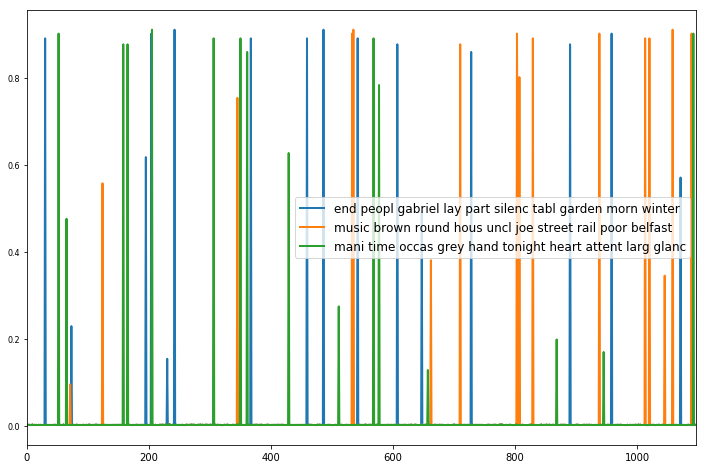

In [14]:
df[[topicLabels[0], topicLabels[1], topicLabels[2]]].plot()

In [20]:
ldaOut = print_top_words(lda,tf_feature_names,n_top_words)

Topic #0:
hair dark guest plate julia music old thing bronz eye ga gabriel hot dish skirt light dali beef distant panel
Topic #1:
good night men young languag mr royal tenor old opera sideboard land piano morn touch neighbour gabriel sing talk compani
Topic #2:
face life brow sake ivor ten hungri least conroy mr minut time feel hand start tipto moment express husband part
Topic #3:
room dish morkan black moment face look hors bridal daughter sky bone patch caretak hous everyth river underfoot work life
Topic #4:
fellow quot nobodi gay voic tell toward hostess vers letter much hope moment summer let wors dublin fussi gate gaswork
Topic #5:
freddi hear good old gabriel malin day mr son hair sir gentleman time last long gretta voic woman right white
Topic #6:
gabriel full life malin secret gaswork joy mind desir memori tender terribl new dark fellow mother poor shoulder cold happi
Topic #7:
aunt kate gabriel julia mind cold gretta word care home stair finish morkan dread arci make great h

<font size = 4, face = 'Times New Roman'>I find it's hard to find a clear topic from the LDA modeling. But we can find some significant words in the result.For example, the words like **Dark, Winter, Annoy, Shadow, cold** can reflect the common atomospher in this book. The words like **Street, House, Bazaaz, Road, Home, Patch, river** are entity which can symbolize something and convey the author's ideas. The words like **Mind, desire, dread, forget** can reflect character's or the auther's emotion. Those words can all give us directions to analyze the common topic.</font>

#### Second Step -- Single Story Analysis

In [16]:
t = []
for text in dubliners:
    best_index, best_n_topic, best_model, tf_vectorizer, tf, lda = TopicAnalysis([text])
    t.append([best_index, best_n_topic, best_model, tf_vectorizer, tf, lda])

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


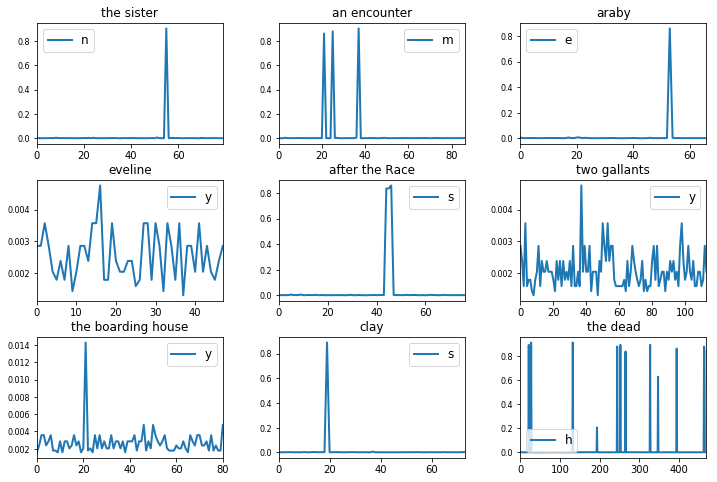

In [17]:
topic = {}
for i in range(len(dublinersName)):
    best_index, best_n_topic, best_model, tf_vectorizer, tf, lda = t[i]
    df_i, topicLabels, tf_feature_names, n_top_words = drawPlot(best_index, best_n_topic, best_model, tf_vectorizer, tf, lda)
    topic[dublinersName[i]] = [topicLabels[0],topicLabels[1],topicLabels[2]] 
    plt.subplot(3,3,i+1)
    plt.subplots_adjust(wspace =0.3, hspace =0.3)
    plt.title(dublinersName[i])
    df_i.ix[:,0].plot()
    plt.legend(topicLabels[0])

<font size = 4, face = 'Times New Roman'>The topic in each story basically conform to the story. And *The Dead* works well. Maybe it's longest story in this book.</font>

In [18]:
for (key, value) in topic.items():
    key2 = key + ':'
    print(key2.ljust(20), value[0])
    print(''.ljust(20), value[1])
    print(''.ljust(20), value[1])

the sister:          night candl knew light thought way dead find flower floor
                     ye fear flynn flower floor finger fine find father glass
                     ye fear flynn flower floor finger fine find father glass
an encounter:        man cat field tire sailor green quay eye crowd tall
                     young influenc hous hour home histori high heart hand halfpenni
                     young influenc hous hour home histori high heart hand halfpenni
araby:               eastern voic side dark guard sens hous hour entranc lamp
                     side bodi morn hair half even eye figur first front
                     side bodi morn hair half even eye figur first front
eveline:             year first distress dusti ernest evelin even face father field
                     meet day white avenu sailor frank week head face father
                     meet day white avenu sailor frank week head face father
after the Race:      street host young men villona respect t

#### Third Step -- Literary Analysis

##### The history of Irend at Joyce's age

<font size = 4, face = 'Times New Roman'>At the time, Ireland was still politically under the rule of the British government. The lives of Dubliners were still controlled by the London Parliament and there was no freedom. The lives of Dubliners were still controlled by the London Parliament and there was no freedom The Irish have always resented the British rule and the rebellious movements of diffent degrees have never been interruoted. By the end of the 19th century, the Irish nationalism had a strong momentum. Among them, party represented by Parnell was most famous and most popular. However, Parnell was accused of going to court because of his prestige in the party. Eventually, the autocrats split under the pressure of internal and external attacks. In 1891, Parnell died and the Irish society became more and turbulent. Since the death of Parnell, the political situation of Irish society has long been paralyzed for Joyce and cannnot be restored. And under the exploitation of the UK, the Irish economy was not optimistic, the society was in a slump, the famine was serious, the population was declining, and people's lives were hard. Religiously, the Catholic forces controlled and influenced every corner of Irish society, which make the social environment become more repressive. The entire Irish society had been paraplyzed, and Dublin was the center of shackles.<br>
To summarize, the people in Ireland or the society was depressive, insensible, tendious and helpless in economics, polotics and religion.</font>

##### Analysis of Stories
<font size = 4, face = 'Times New Roman'><br>
Although the result of LDA modeling cannot give a clear and confirmed topic, it indeed enlightened me to find the profund topic and meaning of *Dunbliners*. I analyzed the results of LDA Topic Modelling and show how the book reflect the paralysis of Dubliners.<br><br> 
The environment:<br><br>
The beginning of *Araby*:<br> 
*NORTH RICHMOND STREET, being blind, was a quiet street except at the hour when the Christian Brothers’ School set the boys free. An uninhabited house of two storeys stood at the blind end, detached from its neighbours in a square ground The other houses of the street, conscious of decent lives within them, gazed at one another with brown imperturbable faces.*<br>
Such kind of description of steet, home, road and so on can be seen everywhere in the novel. Dublin derives the atmosphere of darkness and despression, which makes people's throats tight and unable to breathe.<br><br>

The atmosphere:<br>
In addition to the external environment, the novel has more of a repressed atmosphere. Such atmosphere is not directly depicted, but is rendered through the dialogue of characters and trivial daily life. For example, the school in *The Encounter*, the apartment in *The Boarding House*, the party in *The Dead*. This atmosphere formed an invisible and powerful force that controlled every Dubliner.<br>
There some dialogue in *The Dead*:<br>
*“No,” continued Aunt Kate, “she wouldn’t be said or led by anyone, slaving there in that choir night and day, night and day. Six o’clock on Christmas morning! And all for what?”<br>

“Well, isn’t it for the honour of God, Aunt Kate?” asked Mary Jane, twisting round on the piano-stool and smiling.<br>

Aunt Kate turned fiercely on her niece and said:<br>

“I know all about the honour of God, Mary Jane, but I think it’s not at all honourable for the pope to turn out the women out of the choirs that have slaved there all their lives and put little whipper-snappers of boys over their heads. I suppose it is for the good of the Church if the pope does it. But it’s not just, Mary Jane, and it’s not right.”*<br>
Julia worked like a slave and cannot get respects. The good of the Church and the abnormal society push her to work without breathe. And the people like Julia have no rights to think about theirselves. The personality is repressed and the behavior is social alienation.

The Religion:<br>
Father Flynn’s experience represents the destruction of people by this religion and the reaction of people losing faith in religion. Father Flynn believed in religion and was seriously responsible for his own profession. However, in the end, he did not get the peace and calm he deserved. because of a small mistake he lost his life. In the impression of the child and the two sisters, the pressure of religious affairs is too heavy. Under the pressure of religious affairs, the priest behaved abnormally and his health was also damaged. At the same time, he did not get respects and recognition from the people around him. Instead, he was not able to get children close. After learning of his death, people just said a few words according to common sense, like "May God bless his soul".<br><br>

The Romantic Relationship:<br>
The emotional life of Dubliners is incomplete or failed. From the aspect of love, Whenever it is the aspirations of love in childhood, or the pursuit of love impulses in youth, or the hopeless wait of love in adulthood, people get disappointment and blows. As long as people walk into marriage, it is like walking into a prison, adding another layer to the constraints and restrictions imposed by society. The marriage life makes Dubliners unable to see hope and future. Under such conditions, they attributed the failure to achieve self-worth to marriage, and marriage became synonymous with despair. The external environment in Dublin does not allow people to be happy from marriage and love.<br>
 *Araby*, *Eveline*, *Clay* are the typical stories.<br><br>

The psychology of Dubliners:<br>
The psychological state of the Dubliners is firstly manifested as weakness. The characters are hesitant to face facts and they find it difficult to cope with the changes in life. They physically grasp their own lives. So everything they did ended in failure.<br>
In *The Encounter*, the boy is a child who lacks courage. In order not to be laughed at by others, he thinks other children are like Indians or do some unruly things. When the summer vacation is coming, he decides to go out on a picnic with his friends to escape the dull school life. They met the old man’s speech to prove that he was also a mentally deformed person. The green eyes appeared in the story is important. They herald the demise and defeat of their illusions.<br>
Besides, *After the Race* shows the loss of the Irish main spirit. *Two Gallants* shows the mental numbness, idle, and paradise of the society. *Two Gallants* and *The Dead* shows the close self and refuse to communicate.
</font>

##### Conclusion

<font size = 4, face = 'Times New Roman'>In conclusion, the environment, atmosphere and people's psychology state can be seen as a whole which reflect the paralysis of Dubliners. And religion is one important reasons cause paralysis.  </font>

### Part VI -- Word Count

In [3]:
filename = 'Xinyi DING-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('D:\MyJupyter\Computational literary analysis\Xinyi DING-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1513
